# New section

#strawberry instance segmentation by Prajwal V S



In [ ]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
from math import sin, cos

In [ ]:
def show(image):
    plt.figure(figsize=(10, 10)) # size is in inches
    plt.imshow(image, interpolation='nearest') #nearest neighbour interpolation

def show_hsv(hsv):
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(bgr)
    
def show_mask(mask):
    plt.figure(figsize=(10,10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [ ]:
image = cv2.imread('/content/drive/MyDrive/datasets/train/1359097_berry-1024x693.jpg')
image.shape

(693, 1024, 3)

In [ ]:
x,y,z = image.shape
arr = image.reshape(x*y, -1)
df = pd.DataFrame(arr, columns=['b', 'g', 'r'])
df.describe()

,b,g,r
count,709632.000000,709632.000000,709632.000000
mean,28.674293,112.542381,106.684167
std,46.413878,55.968658,70.189119
min,0.000000,0.000000,3.000000
25%,5.000000,87.000000,46.000000
50%,12.000000,109.000000,80.000000
75%,26.000000,138.000000,179.000000
max,255.000000,255.000000,255.000000


In [ ]:
# Converting BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Resizing to one-third size
image = cv2.resize(image, None, fx=2/3, fy=2/3)

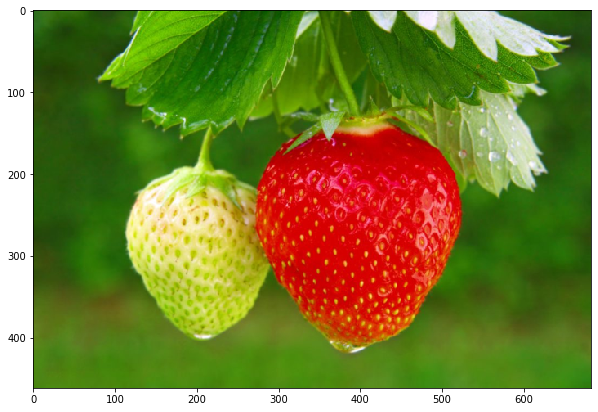

In [ ]:
show(image)

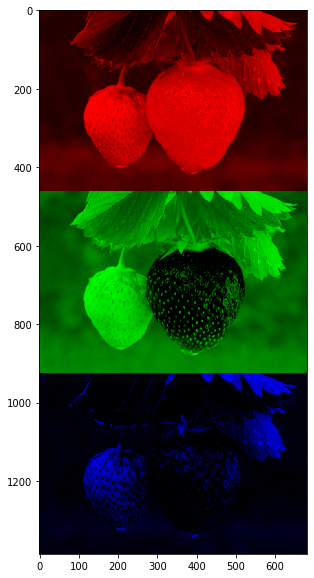

In [ ]:
images = []
for i in range(3):
    color = image.copy()
    if i != 0 :
        color[:,:,0] = 0
    if i != 1 :
        color[:,:,1] = 0
    if i != 2 :
        color[:,:,2] = 0
    images.append(color)

show(np.vstack(images))

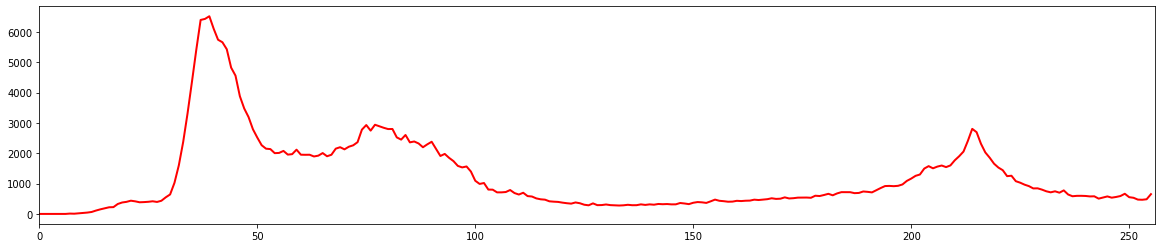

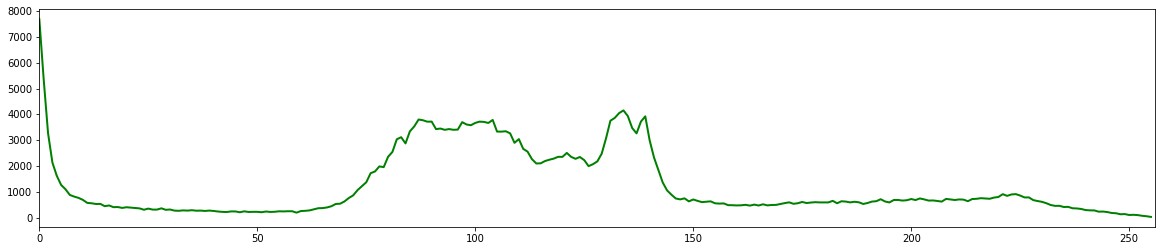

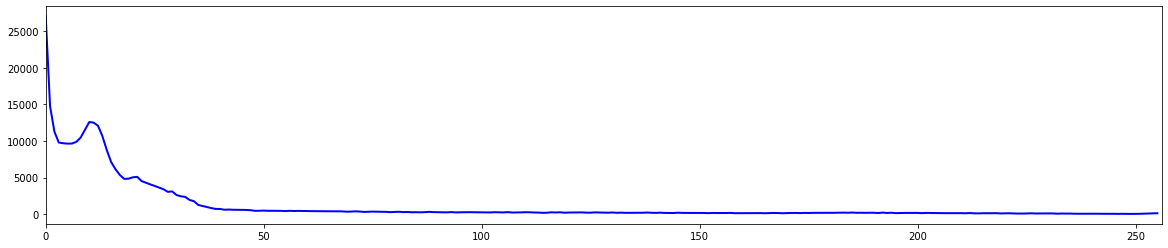

In [ ]:
def RGB_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histr, color=c, lw=2)
        
        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]
        
        # ERROR IN THIS PART        
        
        #plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, linewidth=1)
        plt.xlim([0, 256])

        plt.show()
    
RGB_hist(image)

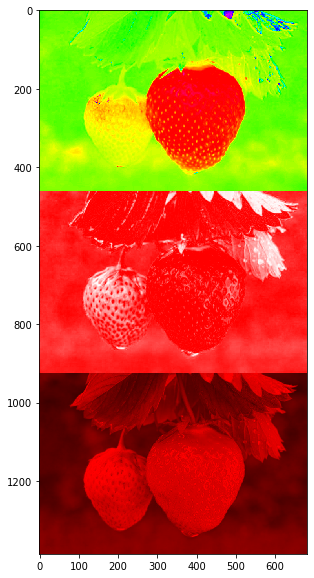

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0:
        colour[:,:,0] = 0
    if i != 1:
        colour[:,:,1] = 255
    if i != 2:
        colour[:,:,2] = 255
        
    images.append(colour)
    
hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

In [ ]:
matplotlib.rcParams.update({'font.size': 16})

# ERROR IN BAR PLOT (TypeError: ONLY LENGTH - 1 ARRAYS CAN BE CONVERTED TO SCALERS)

# def show_hsv_hist(image):
#     # Hue
#     plt.figure(figsize=(20, 3))
#     histr = cv2.calcHist([image], [0], None, [180], [0, 180])
#     plt.xlim([0, 180])
#     colours = [colors.hsv_to_rgb((i/180, 1, 0.9)) for i in range(0, 180)]
#     plt.bar(range(0, 180), histr, color=colours, edgecolor=colours, width=1)
#     plt.title('Hue')

#     # Saturation
#     plt.figure(figsize=(20, 3))
#     histr = cv2.calcHist([image], [1], None, [256], [0, 256])
#     plt.xlim([0, 256])

#     colours = [colors.hsv_to_rgb((0, i/256, 1)) for i in range(0, 256)]
#     plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
#     plt.title('Saturation')

#     # Value
#     plt.figure(figsize=(20, 3))
#     histr = cv2.calcHist([image], [2], None, [256], [0, 256])
#     plt.xlim([0, 256])

#     colours = [colors.hsv_to_rgb((0, 1, i/256)) for i in range(0, 256)]
#     plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
#     plt.title('Value')
    
# show_hsv_hist(hsv)

#blur image slightly


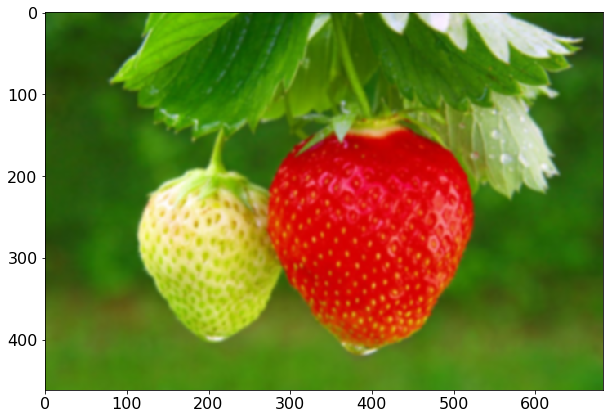

In [ ]:
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

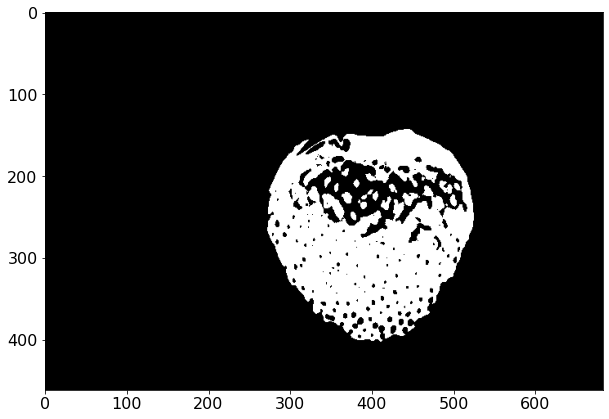

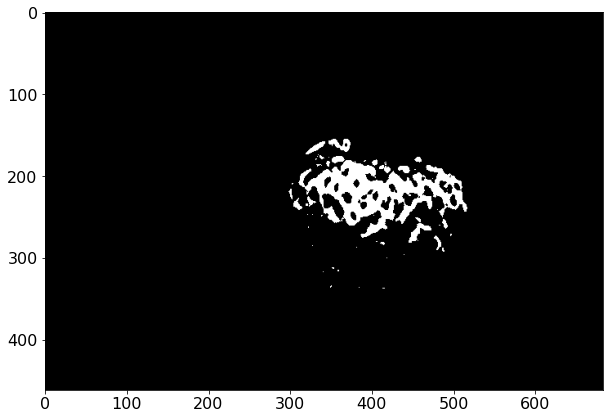

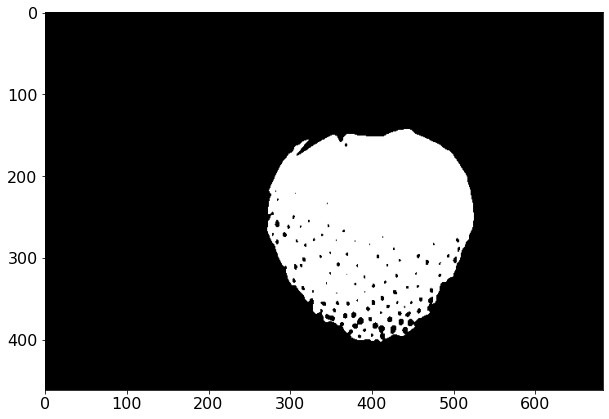

In [ ]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

#0-10 Hue
min_red = np.array([0,100,80])
max_red = np.array([10,256,256])
mask1 = cv2.inRange(image_blur_hsv, min_red, max_red)

#170-180 Hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
mask2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(mask=mask1)
show_mask(mask=mask2)
mask = mask1 + mask2
show_mask(mask)

In [ ]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

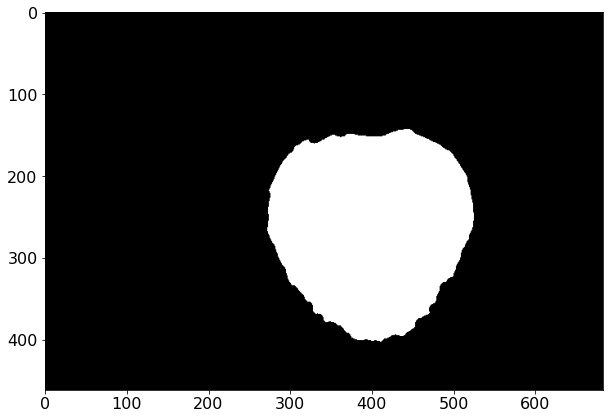

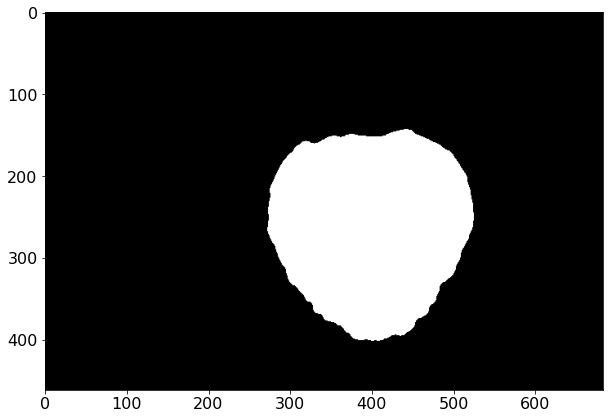

In [ ]:
# Cleaning up the spots left
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
# Filling up small gaps
mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
show_mask(mask_closed)

# Remove specks
image_closed_opened = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_closed_opened)

1


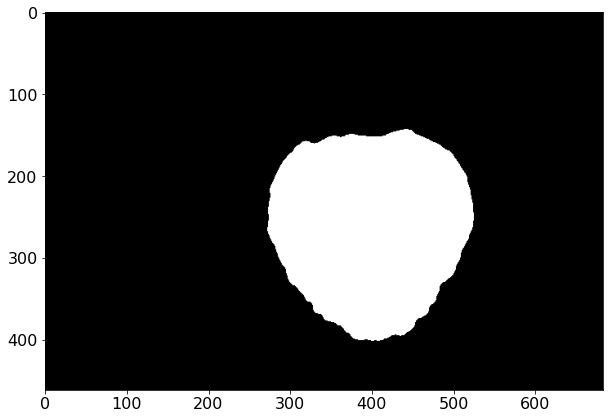

In [ ]:
# Finding biggest contour

def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy= cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_closed_opened)
show_mask(red_mask)

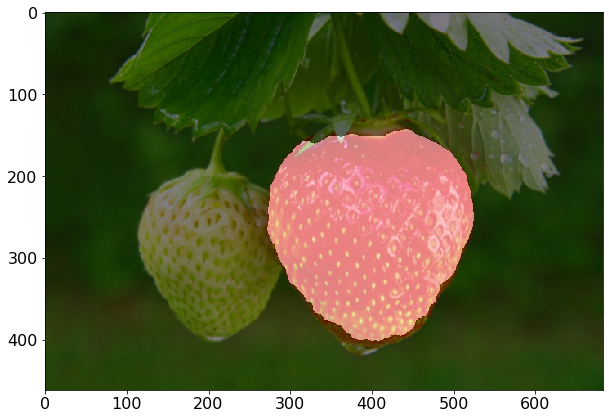

In [ ]:
overlay_mask(red_mask, image)

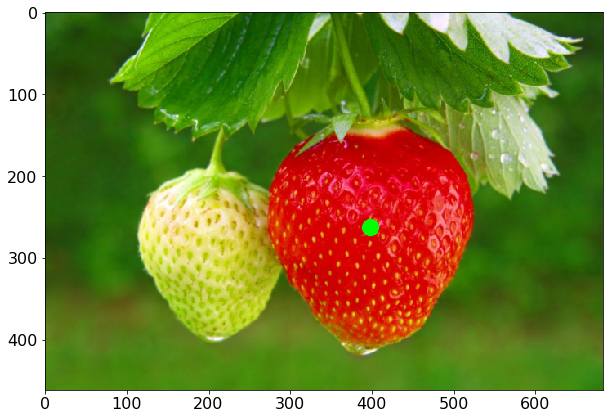

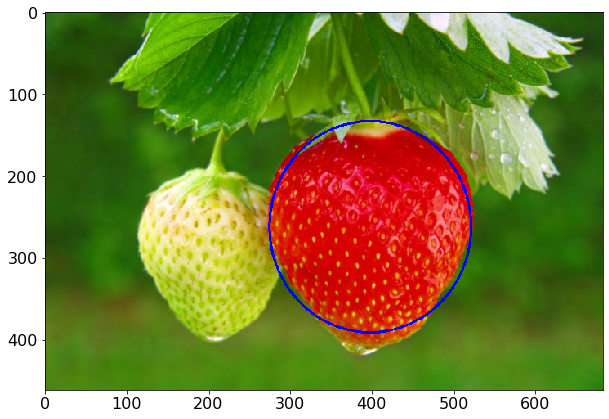

In [ ]:
# Center of mass for Biggest Contour
moments = cv2.moments(red_mask)
center_of_mass = int(moments['m10']/moments['m00']), int(moments['m01']/moments['m00'])
image_COM = image.copy()
cv2.circle(image_COM, center_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
show(image_COM)

#Bounding Ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,0,255), 2)
show(image_with_ellipse)